## Change Earth Orbit by Slingshot Materials from the Moon

In [2]:
import matplotlib.pyplot as plt

import numpy as np


Given the the velocity of the earth being $v_E$ and the velocity of the slingshot material to be $v$, if we want to change the speed of the Earth from $v_E$ to $\alpha v_E$.

The slingshot mass required is $\hat m M_E$ with $M_E$ is the mass of the Earth,

$$
\hat m = \frac{\sqrt{\frac{1}{\alpha}}}{2 v/v_E - 2 - \sqrt{\frac{1}{\alpha}}}.
$$


In [3]:
def mhat(vhat, alpha):

    res = np.sqrt(1/alpha) / ( 2 * vhat - 2 - np.sqrt(1/alpha) )

    return res

In [11]:
mhat(10, 1.01)

0.058514517281809716

In [20]:
np.linspace(1.0, 2.0, 101)

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  ])

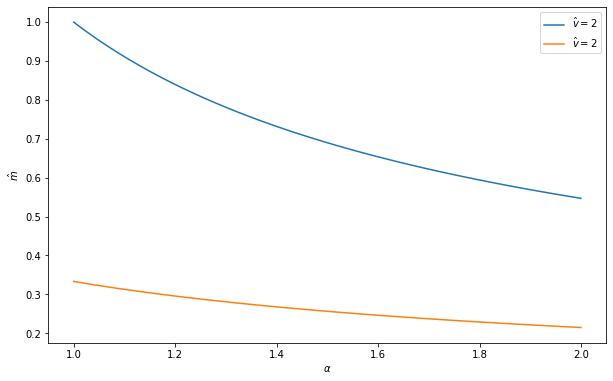

In [37]:
fig, ax = plt.subplots(figsize=(10, 6.18))

alpha_arr = np.linspace(1.0, 2.0, 101)

ax.plot(alpha_arr, mhat(2, alpha_arr), label=r"$\hat v=2$")

ax.plot(alpha_arr, mhat(3, alpha_arr), label=r"$\hat v=2$")



ax.set_xlabel(r"$\alpha$")
ax.set_ylabel(r"$\hat m$")



plt.legend()

plt.show()

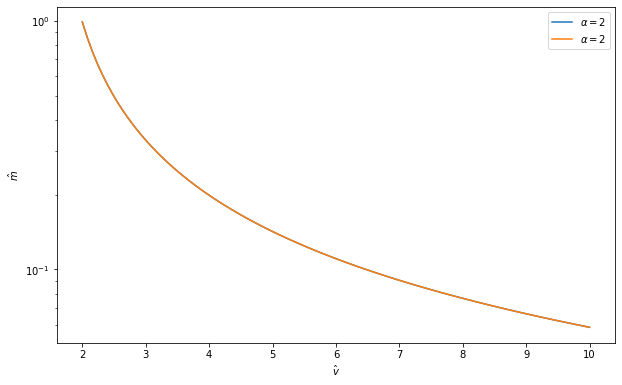

In [40]:
fig, ax = plt.subplots(figsize=(10, 6.18))

vhat_arr = np.linspace(2.0, 10.0, 101)

ax.plot(vhat_arr, mhat(vhat_arr, 1.01), label=r"$\alpha=2$")

ax.plot(vhat_arr, mhat(vhat_arr, 1.01), label=r"$\alpha=2$")


ax.set_xlabel(r"$\hat v$")
ax.set_ylabel(r"$\hat m$")

ax.set_yscale("log")

plt.legend()

plt.show()

## Reasonable $\hat v$

In [42]:
!pip install astropy==4.2.1

     |████████████████████████████████| 9.7 MB 13.2 MB/s 
     |████████████████████████████████| 746 kB 45.3 MB/s 


In [44]:
!pip install poliastro==0.15.0

     |████████████████████████████████| 132 kB 14.2 MB/s 
     |████████████████████████████████| 40 kB 3.6 MB/s 
     |████████████████████████████████| 3.4 MB 31.3 MB/s 
     |████████████████████████████████| 3.9 MB 44.3 MB/s 
     |████████████████████████████████| 112 kB 48.8 MB/s 
     |████████████████████████████████| 115 kB 19.6 MB/s 
     |████████████████████████████████| 802 kB 40.5 MB/s 
     |████████████████████████████████| 45 kB 5.3 MB/s 
     |████████████████████████████████| 25.3 MB 41.3 MB/s 
  Created wheel for jplephem: filename=jplephem-2.15-py3-none-any.whl size=46036 sha256=23f7d2bb90da22e6ad13465782497ceb964c5ccf764371658decc1645d051e26
  Stored in directory: /root/.cache/pip/wheels/61/c7/45/352389757a3b6c9ddfe03bcb599bca17b42dcc99d2a1db3a0c
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=b1eee20e8610cd4048de75d3494179fa4dde4157cc93efc38494526759b875fe
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1

In [67]:
from astropy import units as u

from poliastro.bodies import Earth, Mars, Sun
from poliastro import earth
from poliastro.twobody import Orbit

In [126]:
# Data from Curtis, example 4.3
r = [-10450, 0, 0] * u.km
v = [0, 7, 0] * u.km / u.s

orb = Orbit.from_vectors(Earth, r, v)

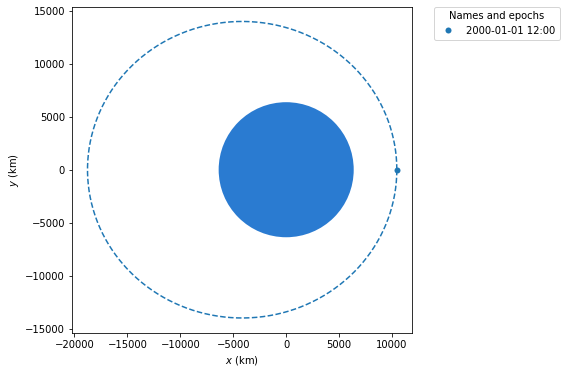

In [127]:
orb.plot()

In [197]:
v_E_value = 29800

v_E = v_E_value * u.km/u.s

v_E

<Quantity 29800. km / s>

In [91]:
Earth.R.value

6378136.6

In [198]:
# Data from Curtis, example 4.3
r = [Earth.R.value * 2/1000, 0, 0] * u.km
v = [0, v_E_value/2000, 0] * u.km / u.s

orb = Orbit.from_vectors(Earth, r, v)

In [199]:
orb

12756 x -17754 km x 0.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.000 (TT)

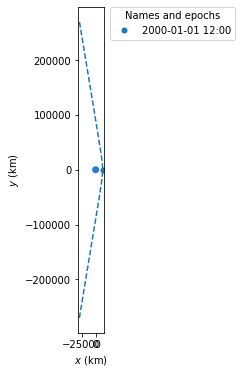

In [200]:
orb.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8a1762a-62b2-46cf-95c0-ea77984dacfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>